<a href="https://colab.research.google.com/github/WillianOliveiraDS/Data_Science/blob/master/Analisando_os_Dados_do_Airbnb_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*by [Willian Oliveira](www.linkedin.com/in/wiillianoliveira)*

---

# Análise dos Dados do Airbnb - *Dublin, Irlanda.*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à capital da Irlanda -  Dublin, e ver quais insights podem ser extraídos a partir de dados brutos.**



## Obtenção dos Dados

Todos os dados usado saqui foram obtidos a partoe do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicail, será baixado apenas o seguinte arquivo: 

* `listings.cvs` Summary information and metrics for listings in Dublin (good for visualisations).


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/ireland/leinster/dublin/2020-05-27/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados .


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,2.03,3,52
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.08,1,208
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,50,3,182,2020-03-09,1.66,3,156
3,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,1.01,3,116
4,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,29,2,311,2020-02-09,3.12,3,299


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do airbnb. Na mesma página que baixamos o aquivo `listings.csv`.
Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`). 

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas;\t{}".format(df.shape[0]))
print("Váriaveis:\t{}\n".format(df.shape[1])) 

Entradas;	8725
Váriaveis:	16



In [ ]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada  á quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group`possui 100% dos seus faltantes.
* As vaiáveis `reviews_per_month`e `last_review`possuem valores nulos em quase metade das linhas.
* A variável `name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.168596
last_review                       0.168596
name                              0.000115
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**  
Para identificar a distribuição das variáveis, irei plotar o histograma.

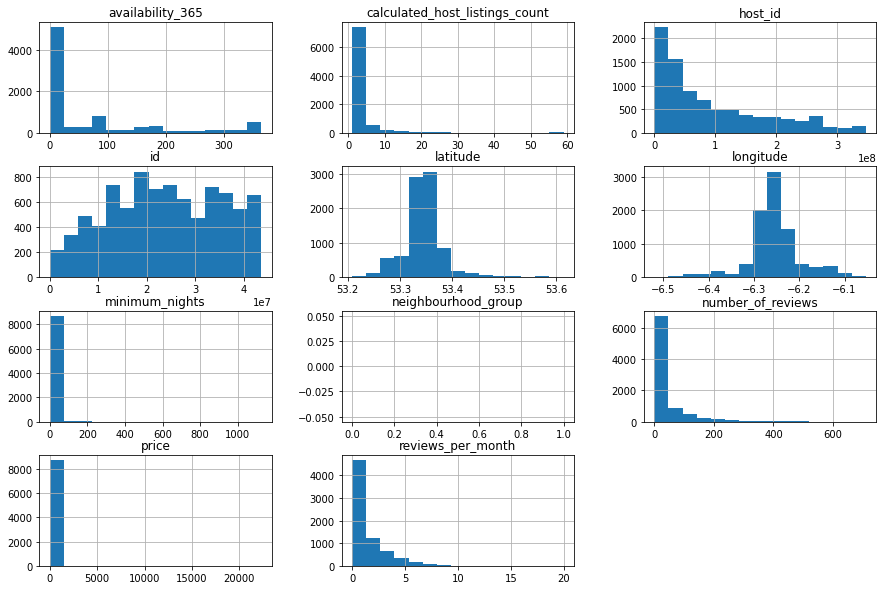

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístivo das variáveis numéricas 
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']]. describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8725.000000,8725.000000,8725.000000,7254.000000,8725.000000,8725.000000
mean,138.554842,4.448138,36.498109,1.443226,3.654212,74.146246
std,353.363599,21.171788,65.127700,1.771498,7.350121,111.795187
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,55.000000,1.000000,1.000000,0.220000,1.000000,0.000000
50%,89.000000,2.000000,9.000000,0.740000,1.000000,0.000000
75%,150.000000,3.000000,39.000000,2.050000,3.000000,112.000000
max,22337.000000,1125.000000,710.000000,19.970000,59.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmaralgumas hipóteses como:
* A variável `price` possui 75% do valor abaixo de 150, porém seu valor máximo é 22337.
* a quantidade mínima de noites (`minimum_nights`) está acima de de 365 dias no ano.

#### Boxplot para minimum_nights

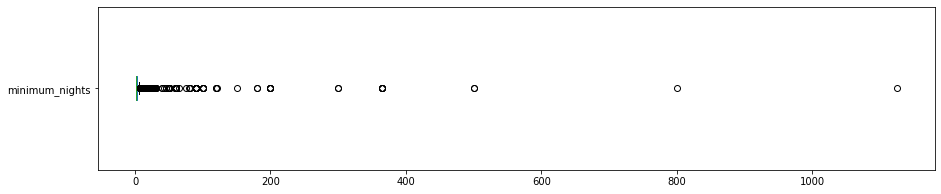

minimum_nights: valores acima de 30: 
72 entradas
0.825215%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30: ")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


#### Histograma sem *outliers* 

Já que identificamos *outliers* nas variáveis `price`e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

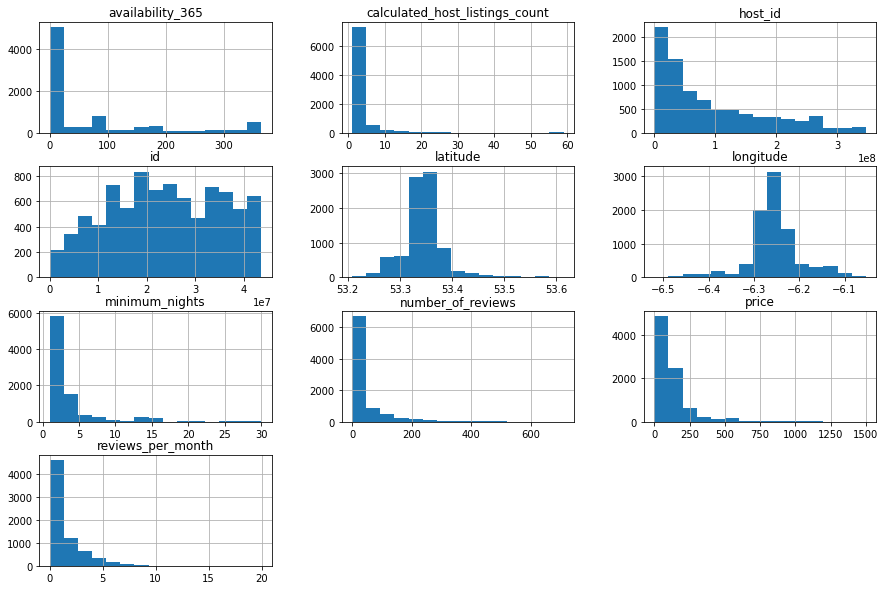

In [ ]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover neighbourhood_group, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas 
df_clean.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price`
round(df_clean.price.mean(), 2)

127.51

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relaçào pode ser medida, e é função do coeficiente de correlações estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interess, Vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)




,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.027374,-0.048952,-0.020259,0.235156,0.084472
minimum_nights,0.027374,1.000000,-0.027139,-0.042163,0.077744,0.050105
number_of_reviews,-0.048952,-0.027139,1.000000,0.808015,0.010260,0.165253
reviews_per_month,-0.020259,-0.042163,0.808015,1.000000,0.063432,0.175233
calculated_host_listings_count,0.235156,0.077744,0.010260,0.063432,1.000000,0.121096
availability_365,0.084472,0.050105,0.165253,0.175233,0.121096,1.000000


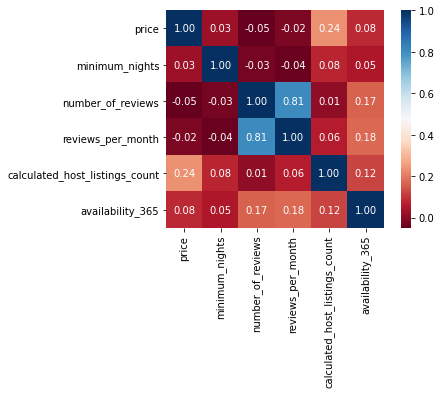

In [ ]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da Variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que exintem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.


vamos contar a quantidade de ocorrências de tipo de aluguel, usando o método `value_counts()`.



In [ ]:
# Mostrar quais os bairros que mais aparecem no Airbnb
df_clean.neighbourhood.value_counts()

Dublin City              6618
Dn Laoghaire-Rathdown     926
Fingal                    758
South Dublin              335
Name: neighbourhood, dtype: int64

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    4226
Private room       4190
Shared room         139
Hotel room           82
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.489290
Private room       0.485122
Shared room        0.016094
Hotel room         0.009494
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Dublin?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.  


In [ ]:
# ver preços por bairros, na média.
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)


neighbourhood
Dublin City              135.429888
Dn Laoghaire-Rathdown    117.962203
Fingal                    89.692612
South Dublin              82.943284
Name: price, dtype: float64

###**Q7. Como os imóveis estão distribuídos pela cidade?**

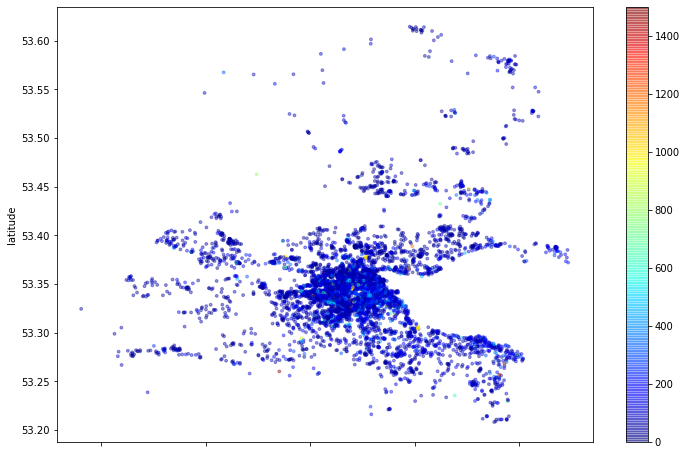

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
round(df_clean.minimum_nights.mean())

3

## Conclusões




Levando em consideração que o dataset usado é um modelo resumido dos disponíveis no Airbnb, através de uma análise superficial já podemos ter idéia do poder que se encontra na mão de quem trabalha com Data Science e Python, com poucas linhas de códigos conseguimos tirar alguns insights bacanas a respeito dos tipo, valores e localidades de hospedagens disponíveis em Dublin que estão cadastradas no site do Airbnb. 